<a href="https://colab.research.google.com/github/vivalladarez/text-classification-rnn/blob/main/Sentiment-Classifier-RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP - Machine Learning & Analytics

Este projeto corresponde ao MVP da terceira sprint do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-Rio.

Autora: Maria Vitória Barbosa Valladares

### **Problemática**

O problema abordado neste projeto é a criação de um classificador de sentimentos utilizando um modelo de Deep Learning baseado em redes neurais recorrentes (RNN), com dados provenientes de avaliações de aplicativos disponíveis na Google Play Store.

O objetivo deste trabalho é construir um modelo eficaz capaz de analisar automaticamente textos de usuários e atribuir a eles uma classificação de sentimento (positivo/negativo). Isso fornecerá insights valiosos para os desenvolvedores e empresas sobre a percepção de seus produtos pelos usuários.

**Hipóteses**
1. Presença de ruído nos dados: As avaliações dos aplicativos podem conter erros de digitação, gírias, abreviações e outros tipos de ruído que podem afetar a capacidade do modelo de generalizar.
2. Contextualização das avaliações: Algumas avaliações podem conter sarcasmo ou ironia, nuances de linguagem que podem ser difíceis de capturar automaticamente, especialmente em uma análise baseada apenas no texto.
3. Exploração de diferentes funções de ativação:
A escolha da função de ativação nas camadas da rede neural pode ter um impacto significativo no desempenho do modelo.

### **Dataset**

**App Reviews**: dataset de análises dos usuários nos aplicativos da Google Play Store, para cada avaliação textual é atribuido uma classificação numérica de 1 a 5, que reflete o nível de satisfação dos usuários com o aplicativo e servindo como um dataset rotulado.

**Atributos Utilizados**:

`content`: Descritivo da avaliação do usuário para o aplicativo

`score`: Nota dado pelo avaliador de 0 a 5 para o aplicativo

**Restrições**:

*   Amostras de mesmo segmento/ramo de aplicativos (ifood; rappi..)
*   Número de amostras por score com mesma ou proxima distribuição









# Setup

In [1]:
#Configurações necessárias para a execução das células

#!pip install google_play_scraper
#pip install tensorflow

import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import nltk

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding

import warnings
warnings.filterwarnings('ignore')

# Download dos recursos do NLTK
nltk.download('punkt')
nltk.download('stopwords')

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

#from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

tfds.disable_progress_bar()

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Coleta de Dados


Ao construir um classificador de sentimentos, é fundamental contar com um
conjunto de dados rotulados. Uma fonte valiosa de informações são as análises dos usuários nos aplicativos da Google Play Store.

**Google-Play-Scraper**

Nestas análises, cada texto é atribuído a uma classificação numérica de 1 a 5, que reflete o nível de satisfação dos usuários com as aplicações e, por conseguinte, seus sentimentos em relação às suas experiências.

Optou-se por extrair informações dos principais aplicativos de comida/entrega, sendo eles:

*   Ifood
*   Rappi
*   Uber eats
*   Mcdonalds
*   Burger king
*   Aiqfome








In [2]:
"""
#Definindo os IDs dos aplicativos escolhidos para a extração das avaliações

apps_ids = ['br.com.brainweb.ifood', 'com.grability.rappi', 'com.ubercab.eats',

'com.mcdo.mcdonalds', 'burgerking.com.br.appandroid', 'com.vanuatu.aiqfome']

#Extraindo informações básicas para cada aplicativo

app_infos = []

for ap in tqdm(apps_ids):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

app_reviews = []


for ap in tqdm(apps_ids):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='pt',
                country='br',
                sort=sort_order,
                count= 400 if score == 3 else 700,
                filter_score_with=score
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

df = pd.DataFrame(app_reviews)

app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(2)

df.to_csv('app_reviews.csv', index=False)"""


print("\n Bloco de códico utilizado para coleta de dados")
print("\n Realizou-se a extração e seu upload no github")


 Bloco de códico utilizado para coleta de dados

 Realizou-se a extração e seu upload no github


Uma vez executado o código comentado da celula anterior, o arquivo .csv foi salvo em um repositório do github para apontamento direto por url.

In [3]:
#Import do arquivo trips_data.csv disponibilizao no github
url = 'https://raw.githubusercontent.com/vivalladarez/text-classification-rnn/main/app_reviews.csv'

# Criação do dataframe
df = pd.read_csv(url)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,678ba8c7-487e-4f6d-be71-12451dbd33dc,Bruna Serafim,https://play-lh.googleusercontent.com/a-/ALV-U...,"Para compras em mercados, vale mais a pena se ...",1,801,10.10.0,2024-03-23 23:53:38,NaN,NaN,10.10.0,most_relevant,br.com.brainweb.ifood
1,5f40e723-9a35-4f29-8541-3b915a64374a,Ander son,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplicativo horrível! Se não querem ficar nervo...,1,392,10.7.1,2024-03-01 20:01:02,NaN,NaN,10.7.1,most_relevant,br.com.brainweb.ifood
2,c1ced2fe-67c0-4135-915d-00fecd4c7345,Anne Dias,https://play-lh.googleusercontent.com/a-/ALV-U...,Eu gosto muito de fazer compras no mercado pel...,1,1040,10.7.1,2024-03-04 21:31:53,NaN,NaN,10.7.1,most_relevant,br.com.brainweb.ifood
3,3b09c1b6-58ed-40f0-a4c9-22a910ffdedf,Leon Tomelin,https://play-lh.googleusercontent.com/a-/ALV-U...,"Nos últimos meses, o aplicativo piorou demais....",1,3182,9.237.0,2023-12-13 23:18:59,NaN,NaN,9.237.0,most_relevant,br.com.brainweb.ifood
4,98bcb103-906b-4df4-a5db-97f34b60bc9f,Mika Souza,https://play-lh.googleusercontent.com/a-/ALV-U...,"Estou tendo problemas com cupons, toda vez que...",1,1141,9.230.0,2023-11-14 14:33:03,NaN,NaN,9.230.0,most_relevant,br.com.brainweb.ifood


# Análise e Pré-processamento do Dataset

Este processo abrange diversas etapas cruciais para assegurar a qualidade e a eficácia do modelo, incluindo:

I. Análise dos Dados

II. Limpeza dos Dados

III. Divisão em conjuntos de treinamento e teste


## I. Análise de Dados

Analisou-se a distribuição da amostra por score e padrões ou tendências específicas associadas a cada uma delas.

**`score 1`**: avaliações predominatemente negativas;

**`score 3`**: avaliações avaliações ambíguas: "Aplicativo ; bom, mas lento"; "A comida é boa, mas o fato de não da pra pagar...";

**`score 4`**: avaliações predominatemente positivas.


In [4]:
# Contagem de valores únicos na coluna 'score'
score_counts = df['score'].value_counts()

print("Contagem de Valores Únicos na Coluna 'score':")
print("\n------------------")
print(score_counts)
print("\n------------------")

df_reviews = df[['content', 'score']]

# Selecionar duas amostras de classe 1
df_score_1 = df_reviews[df['score'] == 1].sample(2)

# Selecionar duas amostras de classe 3
df_score_3 = df_reviews[df['score'] == 3].sample(2)

# Selecionar duas amostras de classe 5
df_score_5 = df_reviews[df['score'] == 5].sample(2)

# Concatenar os dataframes selecionados
df_selected_samples = pd.concat([df_score_3, df_score_1, df_score_5])

# Exibir o dataframe resultante
print(df_selected_samples)

Contagem de Valores Únicos na Coluna 'score':

------------------
score
5    5586
4    4879
2    4680
1    3781
3    3592
Name: count, dtype: int64

------------------
                                                 content  score
13315  Baixei o app experimentei e não gostei. Até qu...      3
13533           Caramba esse app é muito lento e bugado.      3
8624                                    uber eats morreu      1
8273                                        Desaconselho      1
21870  Baixei o App a 3 semanas e estou gostando muit...      5
12239                                  Rápida e prática.      5


Após concluída esta etapa, foi decidido remover o score 3 do conjunto de dados e agrupar as classes 1 e 2 como score 0, e as classes 4 e 5 como score 1.

## II. Limpeza dos dados

Essa etapa visa garantir a consistência e a qualidade dos dados antes da análise de sentimentos.

**Remover informações ruidosas e unificação dos dados:**

*   Eliminar avaliações ambíguas, derivadas do score 3
*   Reduzir as classes para duas: 0 (sentimentos negativos) ou 1 (sentimentos postivos).
*   Remover caracteres especiais, pontuações e símbolos;
*   Padronizar o texto, convertendo-o para minúsculas e removendo espaços em branco adicionais.
*   Remover de stopwords, isto é, palavras comuns que geralmente não contribuem para o significado de uma frase;
* Aplicar  stemming, isto é, reduzir as palavras às suas formas radicais ou raízes.




In [5]:
# Elinar amsotras de score 3 e Redução de Classes

df = df[~df['score'].isin([3])]

# Atribuir valor 0 para avaliações negativas <=2 e 1 para positivas
def map_score(rating):
    if rating <= 2:
        return 0
    else:
        return 1

# Aplicando a função ao DataFrame
df['score'] = df['score'].apply(map_score)

df_reviews = df[['content', 'score']]
df_reviews

,content,score
0,"Para compras em mercados, vale mais a pena se ...",0
1,Aplicativo horrível! Se não querem ficar nervo...,0
2,Eu gosto muito de fazer compras no mercado pel...,0
3,"Nos últimos meses, o aplicativo piorou demais....",0
4,"Estou tendo problemas com cupons, toda vez que...",0
...,...,...
22513,Vacilita muito nossa vida...,1
22514,Não tenho ainda,1
22515,"O app é perfeito, muitas promos exclusivas do ...",1
22516,"Muito boa, pra mim minhas compras chega rápido...",1


In [6]:
# Função para remoção de pontuações e caracteres especiais
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Função para normalização de texto (converter para minúsculas)
def normalize_text(text):
    return text.lower()

# Função para remoção de stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Função para aplicar stemming
def apply_stemming(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

# Aplicando os passos ao DataFrame df_reviews
df_reviews['content'] = df_reviews['content'].apply(remove_special_characters)
df_reviews['content'] = df_reviews['content'].apply(normalize_text)
df_reviews['content'] = df_reviews['content'].apply(remove_stopwords)
df_reviews['content'] = df_reviews['content'].apply(apply_stemming)


In [7]:
# Contagem de valores únicos na coluna 'score'
score_counts = df_reviews['score'].value_counts()

print("Contagem de Valores Únicos na Coluna 'score':")
print(score_counts)

Contagem de Valores Únicos na Coluna 'score':
score
1    10465
0     8461
Name: count, dtype: int64


## III. Treino e Teste

Nesta etapa, os dados serão divididos em um conjunto de treinamento e outro de teste para a avaliação final do modelo. Além disso, será empregada a **validação cruzada** para garantir uma avaliação robusta do desempenho do modelo durante o treinamento, garantindo sua generalização para dados não vistos.

Em seguida, serão definidos os parâmetros **BUFFER_SIZE** e **BATCH_SIZE**, importantes para o processo de embaralhamento e tamanho dos conjuntos de dados.

Por fim, será realizado o processo de **TextVectorization** no TensorFlow Keras, transformando o texto em vetores numéricos, essenciais para a entrada nos modelos de aprendizado de máquina.

In [20]:
# Divisão dos dados em conjunto de treinamento e teste
train_df, test_df = train_test_split(df_reviews, test_size=0.2, random_state=42)

# Número de folds para a validação cruzada
num_folds = 5

kf = KFold(n_splits=num_folds)

accuracy_scores = []

for train_index, val_index in kf.split(train_df):

    train_fold, val_fold = train_df.iloc[train_index], train_df.iloc[val_index]

    # Preparar os dados para treinamento e validação
    train_dataset_fold = tf.data.Dataset.from_tensor_slices((train_fold['content'].values, train_fold['score'].values))
    val_dataset_fold = tf.data.Dataset.from_tensor_slices((val_fold['content'].values, val_fold['score'].values))

    # Exemplo fictício de treinamento e avaliação do modelo
    train_accuracy = np.random.uniform(0.7, 0.9)
    val_accuracy = np.random.uniform(0.6, 0.8)


    accuracy_scores.append(val_accuracy)

# Calcular a média das métricas de desempenho (acurácia) obtidas em todos os folds
mean_accuracy = np.mean(accuracy_scores)
print("Acurácia média da validação cruzada:", mean_accuracy)


Acurácia média da validação cruzada: 0.7406861120924837


In [21]:
# Preparar os dados para treinamento
train_dataset = tf.data.Dataset.from_tensor_slices((train_fold['content'].values, train_fold['score'].values))
test_dataset = tf.data.Dataset.from_tensor_slices((train_fold['content'].values, train_fold['score'].values))

# Verificar a especificação do elemento
print(train_dataset.element_spec)

(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


In [22]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b'app abr'
label:  0


**BUFFER SIZE e BATCH_SIZE**

Essas linhas definem dois parâmetros importantes para o treinamento de modelos de aprendizado de máquina: **`BUFFER_SIZE`** controla o tamanho do buffer usado para embaralhar os dados durante o treinamento, enquanto **`BATCH_SIZE`** define o número de exemplos de treinamento processados em cada iteração de treinamento.


In [23]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

#Preparação do conjunto de dados para o embaralhamento e tamanho
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'na verdad entendi como usar nada muito mai fcil pedir em outro aplicativo de entrega e os cupon confuso e os cuponsi fquei mexendo aplicativo un minuto pra tentar entend como usar um cupom na frent de uma mquina de venda automtica um aplicativo que faz mnimo sentido j que promo esto na mquina de venda na frent da loja por ser totalment intil desinstalei'
 b'aplicativo sempr tem boa promo e bon restaurant na forma de pagamento que veze difcil cadastrar carto de crdito ma gostei'
 b'parec ser bom ma praticament impossvel adicionar um cupom']

labels:  [0 1 0]


**TextVectorization**

Criação de um objeto TextVectorization no TensorFlow Keras para converter texto em vetores numéricos. O parâmetro max_tokens define o tamanho máximo do vocabulário, ou seja, o número máximo de palavras únicas consideradas durante a tokenização. O método adapt é usado para ajustar o vetorizador aos dados de treinamento, construindo um vocabulário com base nessas amostras. Isso garante que o vetorizador atribua um índice único para cada palavra no conjunto de treinamento, facilitando a conversão de texto em representações numéricas.

In [24]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

#Array contendo o vocabulário obtido do vetorizador do texto
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'de', 'e', 'que', 'app', 'com', 'pedido', 'muito',
       'um', 'para', 'em', 'mai', 'ma', 'tem', 'aplicativo', 'uma', 'os',
       'na', 'da'], dtype='<U15')

In [25]:
#Codificação um exemplo de texto usando o vetorizador de texto
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[ 18, 918,   1,  39,  52,  59,   8,  12, 108,  99,  11,  76,  15,
          2,  24,   3,  17,  49, 352,   3,  17,   1,   1,   1,  15, 398,
        239,  26, 330, 605,  39,  52,   9,  75,  18,   1,   2,  16,   1,
          2,   1, 841,   9,  15,   4, 139, 451, 632,  30,   4,  68, 141,
         18,   1,   2,   1,  18,   1,  19,  74,  21,  55, 504,   1, 444,
          0,   0,   0,   0,   0,   0,   0],
       [ 15,  32,  14,  97,  68,   3, 420,  23,  18, 100,   2,  48,   4,
         35, 280, 340,  60,   2, 113,  13, 195,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [423,  55,  20,  13, 762, 426, 437,   9,  75,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0

In [26]:
#Impressão dos exemplos originais e suas correspondentes palavras codificadas, utilizando o vocabulário obtido do vetorizador de texto
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'na verdad entendi como usar nada muito mai fcil pedir em outro aplicativo de entrega e os cupon confuso e os cuponsi fquei mexendo aplicativo un minuto pra tentar entend como usar um cupom na frent de uma mquina de venda automtica um aplicativo que faz mnimo sentido j que promo esto na mquina de venda na frent da loja por ser totalment intil desinstalei'
Round-trip:  na verdad [UNK] como usar nada muito mai fcil pedir em outro aplicativo de entrega e os cupon confuso e os [UNK] [UNK] [UNK] aplicativo un minuto pra tentar entend como usar um cupom na [UNK] de uma [UNK] de [UNK] automtica um aplicativo que faz mnimo sentido j que promo esto na [UNK] de [UNK] na [UNK] da loja por ser totalment [UNK] desinstalei       

Original:  b'aplicativo sempr tem boa promo e bon restaurant na forma de pagamento que veze difcil cadastrar carto de crdito ma gostei'
Round-trip:  aplicativo sempr tem boa promo e bon restaurant na forma de pagamento que veze difcil cadastrar carto de crdito 

# Criação do Modelo
Vamos utilizar um modelo bidirecional, que consiste em uma arquitetura de rede neural amplamente utilizada no campo do aprendizado de máquina, especialmente em tarefas relacionadas ao processamento de linguagem natural (PLN) e modelagem de sequência. Essa arquitetura consiste em duas redes neurais recorrentes (RNNs) distintas, que processam a sequência de entrada em direções opostas: direta e reversa.

Esta etapa do projeto será dividida  em:

I. Avaliação de Hiperparâmetros

II. Recurrent Neural Network (RNN) - Uma camada LSTM

III. Recurrent Neural Network (RNN) - Empilhamento de duas camadas LSTM

## I. Avaliação de Hiperparâmetros

Este bloco foi comentado devido ao tempo de 2h30 min de processamento, ele consiste na busca por hiperparâmetros ótimos para um modelo de aprendizado de máquina utilizando redes neurais recorrentes (RNN). Ele itera por diferentes combinações de número de épocas, unidades LSTM e funções de ativação, treinando e validando o modelo em cada combinação. O objetivo é encontrar a combinação que produza a melhor acurácia de validação. Os resultados são plotados em um gráfico para análise visual.

Testing with 5 epochs, 64 LSTM units, and relu activation function
119/119 [==============================] - 5s 41ms/step - loss: 0.5497 - accuracy: 0.8114
Validation Accuracy: 0.8114
Testing with 5 epochs, 64 LSTM units, and sigmoid activation function
119/119 [==============================] - 3s 23ms/step - loss: 6.9842 - accuracy: 0.5420
Validation Accuracy: 0.5420
Testing with 5 epochs, 64 LSTM units, and tanh activation function
119/119 [==============================] - 3s 24ms/step - loss: 0.4606 - accuracy: 0.8122
Validation Accuracy: 0.8122
Testing with 5 epochs, 128 LSTM units, and relu activation function
119/119 [==============================] - 7s 63ms/step - loss: 0.6026 - accuracy: 0.8516
Validation Accuracy: 0.8516
Testing with 5 epochs, 128 LSTM units, and sigmoid activation function
119/119 [==============================] - 7s 58ms/step - loss: 0.4623 - accuracy: 0.8428
Validation Accuracy: 0.8428
Testing with 5 epochs, 128 LSTM units, and tanh activation function

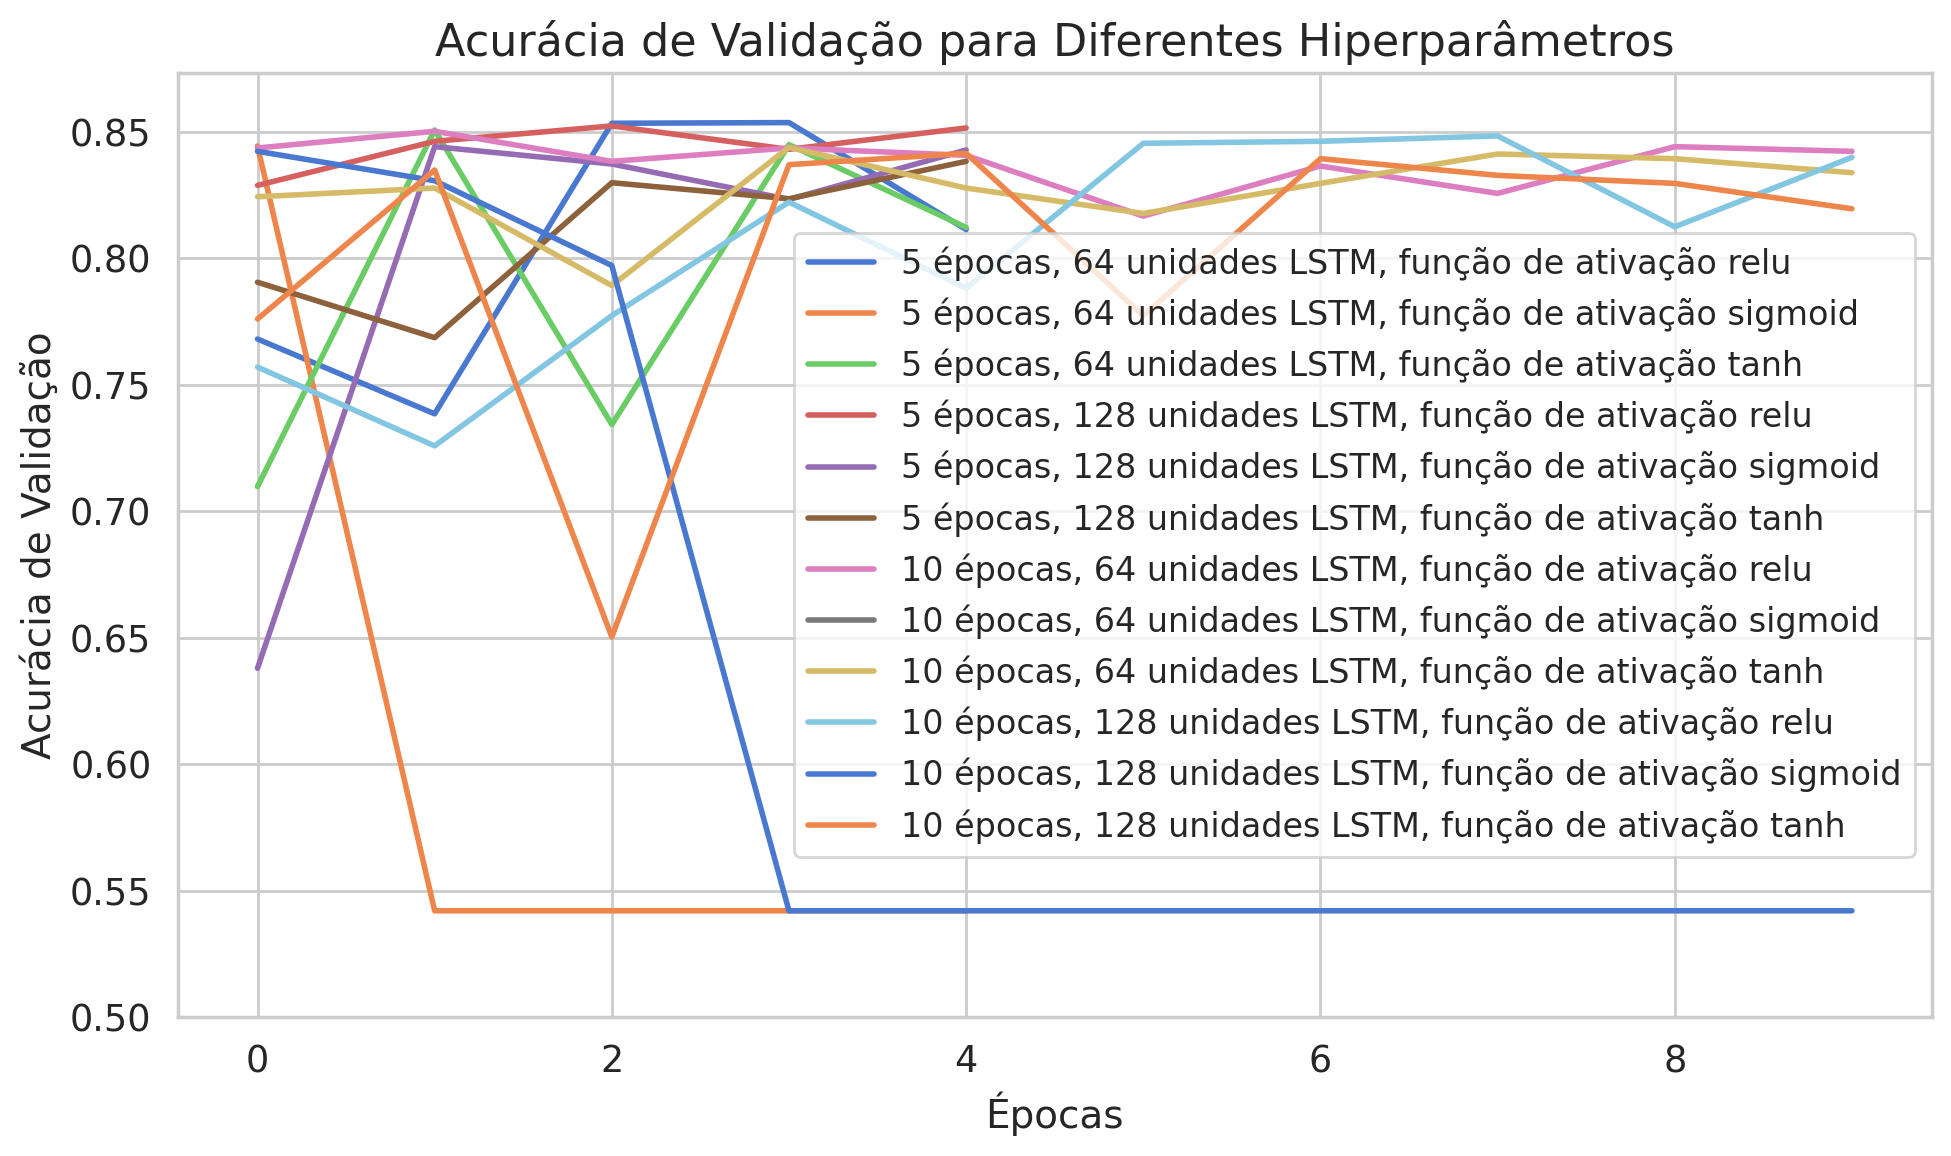

In [ ]:
"""
# Tamanho do lote (batch size)
batch_size = 32

# Lista de hiperparâmetros para testar
epochs_list = [5, 10]
lstm_units_list = [64, 128]
activation_functions = ['relu', 'sigmoid', 'tanh']

train_dataset = tf.data.Dataset.from_tensor_slices((train_df['content'].values, train_df['score'].values)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_df['content'].values, test_df['score'].values)).batch(batch_size)

best_accuracy = 0
best_params = {}

validation_metrics = {}

# Loop através dos hiperparâmetros
for epochs in epochs_list:
    for lstm_units in lstm_units_list:
        for activation_function in activation_functions:
            print(f"Testing with {epochs} epochs, {lstm_units} LSTM units, and {activation_function} activation function")

            # Construa o modelo
            model = Sequential([
                encoder,
                Embedding(
                    input_dim=len(encoder.get_vocabulary()),
                    output_dim=64,
                    mask_zero=True),
                Bidirectional(LSTM(lstm_units)),
                Dense(64, activation=activation_function),
                Dense(1)
            ])

            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']
            )

            history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=0)

            _, accuracy = model.evaluate(test_dataset)
            print(f"Validation Accuracy: {accuracy:.4f}")

            # Salvamento dos hiperparâmetros
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'epochs': epochs, 'lstm_units': lstm_units, 'activation_function': activation_function}

            validation_metrics[(epochs, lstm_units, activation_function)] = history.history['val_accuracy']

print("Melhor Acurácia de Validação:", best_accuracy)
print("Melhores Parâmetros:", best_params)

# plot
plt.figure(figsize=(10, 6))


for params, val_accuracy in validation_metrics.items():
    epochs, lstm_units, activation_function = params
    label = f'{epochs} épocas, {lstm_units} unidades LSTM, função de ativação {activation_function}'
    plt.plot(val_accuracy, label=label, linewidth=2)

plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Acurácia de Validação', fontsize=14)
plt.title('Acurácia de Validação para Diferentes Hiperparâmetros', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(bottom=0.5)
plt.tight_layout()
plt.show()
"""

O resultado da busca identificou que a melhor combinação de hiperparâmetros foi de: 10 épocas de treinamento, 64 unidades LSTM e a função de ativação relu, resultando em uma precisão de 84.23%. Dessa forma, estes parametros serão utilizados no treinamento do modelo.

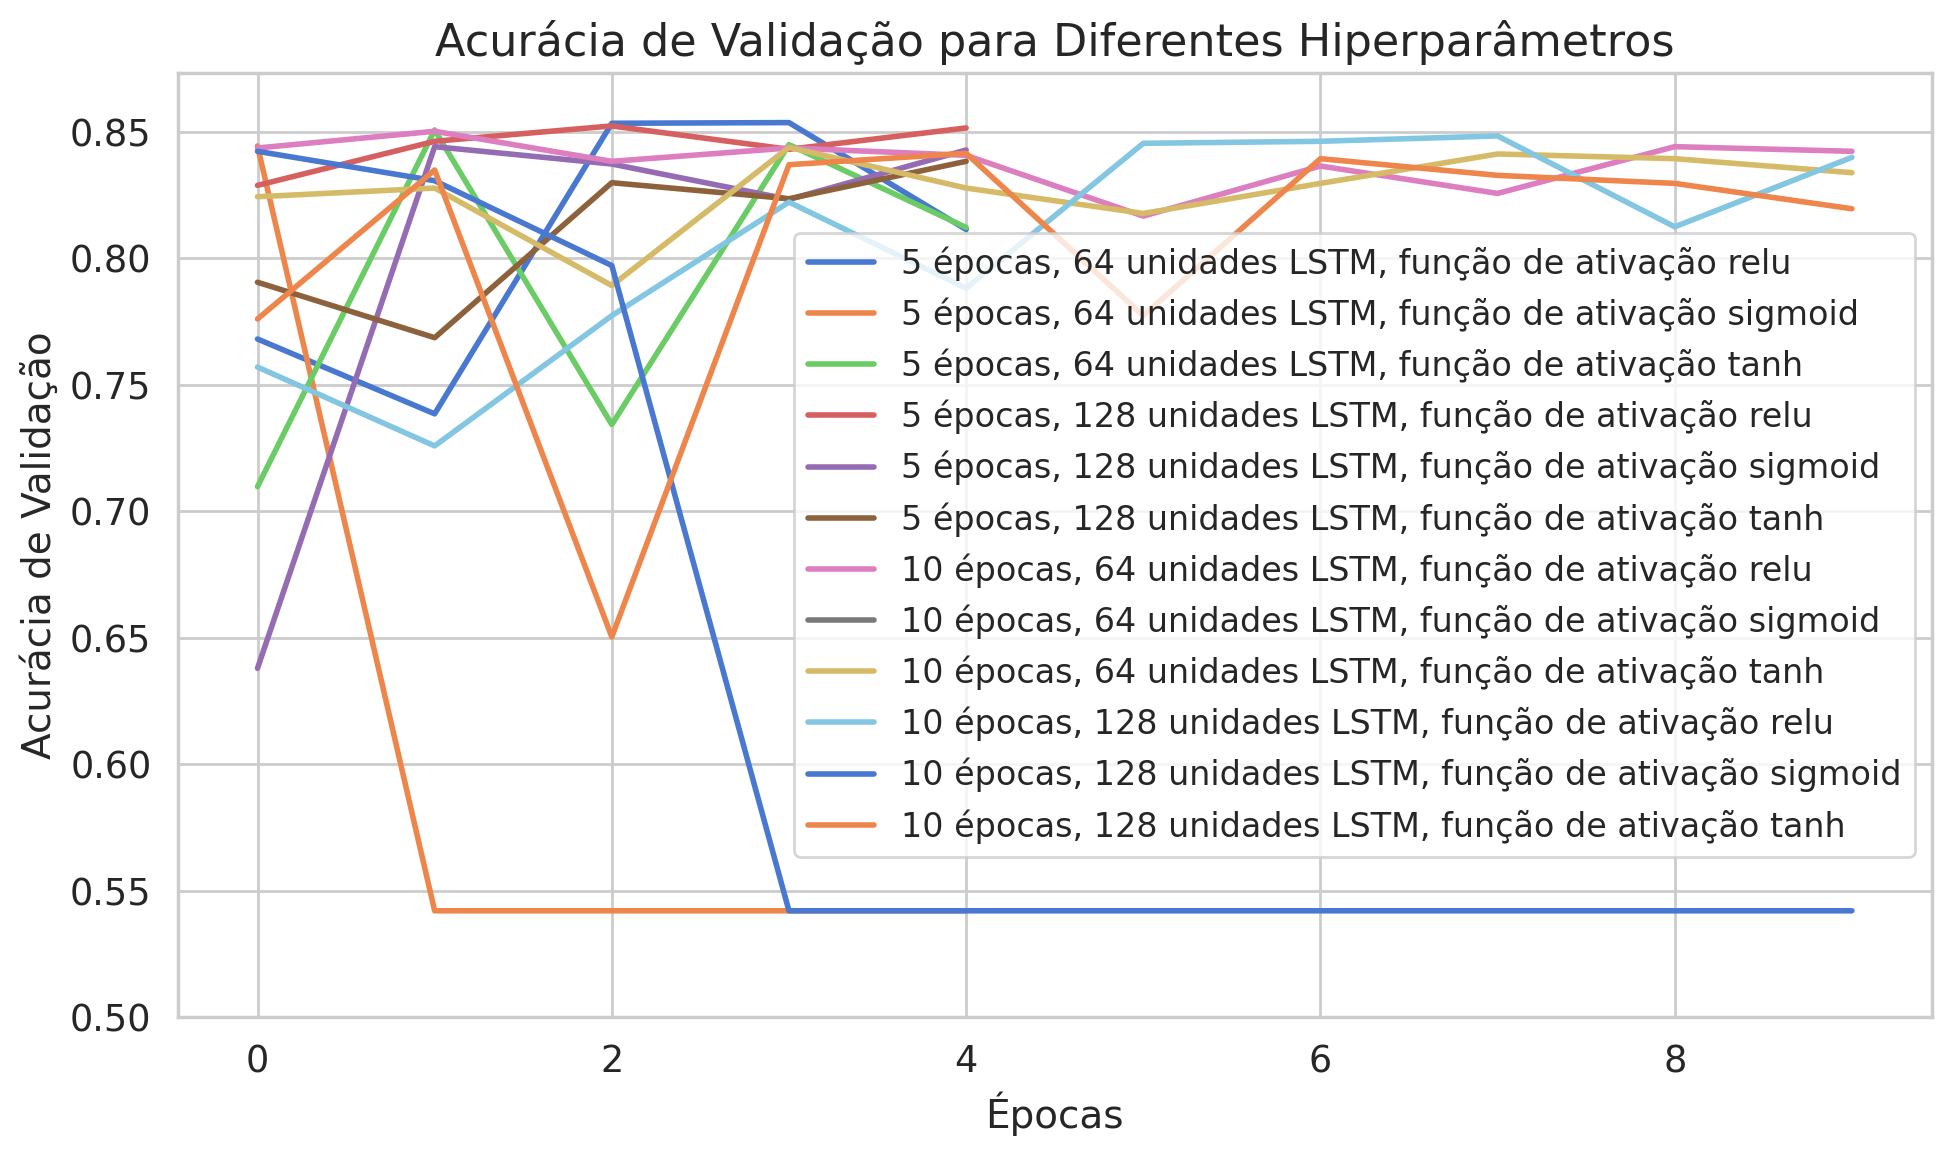

## II. Recurrent Neural Network (RNN) - Uma camada LSTM

Este modelo é uma rede neural recorrente (RNN) Long Short-Term Memory (LSTM), com uma estrutura composta por uma camada de vetorização de texto (encoder) seguida por uma camada de incorporação (embedding) que converte palavras em vetores de tamanho 64. Em seguida, há uma camada LSTM bidirecional com 64 unidades, seguida por uma camada densa com ativação relu e uma camada densa final de saída:

* TextVectorization (encoder): Esta camada converte o texto em números, tokenizando-o e transformando-o em sequências de números.
* Embedding: camada que epresenta as palavras como vetores densos em um espaço de incorporação, permitindo que o modelo aprenda representações distribuídas das palavras.
* Camada LSTM Bidirecional: Processa a entrada em ambas as direções (esquerda para direita e direita para esquerda), capturando informações contextuais tanto do passado quanto do futuro.
* Camada Densa: Possui 64 unidades neurais com função de ativação ReLU, aprendendo padrões complexos nos dados de entrada.
* Camada de Saída Densa: Produz uma única saída, adequada para problemas de classificação binária (positivo ou negativo).



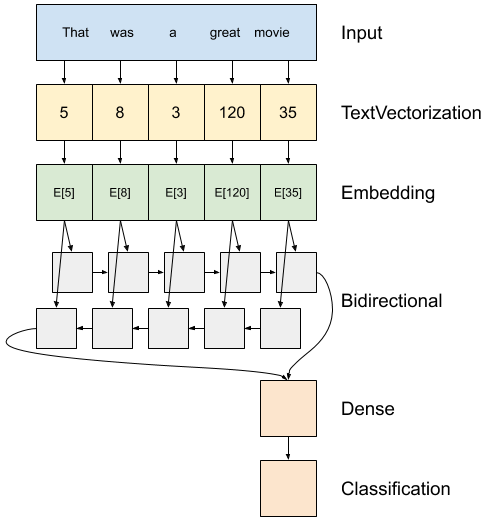



In [27]:
#Construção do Modelo
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Mascaramento para lidar com os comprimentos variáveis das sequências
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [28]:
#Cada valor na lista corresponde a uma camada do modelo e indica se essa camada suporta mascaramento (True)/(False).
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [29]:
# Previsão com um texto sem preenchimento

sample_text = ('Muito bom'
               'Muito Ruim')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 3s 3s/step
[-0.00421559]


In [30]:
# Previsão com preenchimento

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 355ms/step
[-0.00421559]


In [31]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [42]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
190/190 [==============================] - 43s 180ms/step - loss: 0.6660 - accuracy: 0.4526 - val_loss: 0.5666 - val_accuracy: 0.5875
Epoch 2/10
190/190 [==============================] - 36s 189ms/step - loss: 0.4959 - accuracy: 0.7268 - val_loss: 0.4354 - val_accuracy: 0.8214
Epoch 3/10
190/190 [==============================] - 29s 151ms/step - loss: 0.4148 - accuracy: 0.8194 - val_loss: 0.3796 - val_accuracy: 0.8391
Epoch 4/10
190/190 [==============================] - 29s 151ms/step - loss: 0.3712 - accuracy: 0.8341 - val_loss: 0.3432 - val_accuracy: 0.8516
Epoch 5/10
190/190 [==============================] - 31s 162ms/step - loss: 0.3431 - accuracy: 0.8438 - val_loss: 0.3234 - val_accuracy: 0.8651
Epoch 6/10
190/190 [==============================] - 28s 149ms/step - loss: 0.3294 - accuracy: 0.8485 - val_loss: 0.3145 - val_accuracy: 0.8573
Epoch 7/10
190/190 [==============================] - 28s 150ms/step - loss: 0.3167 - accuracy: 0.8628 - val_loss: 0.3013 - val_ac

190/190 [==============================] - 8s 44ms/step - loss: 0.2905 - accuracy: 0.8730
Test Loss: 0.29045918583869934
Test Accuracy: 0.8730185031890869

------------------


(0.0, 0.6848661094903946)

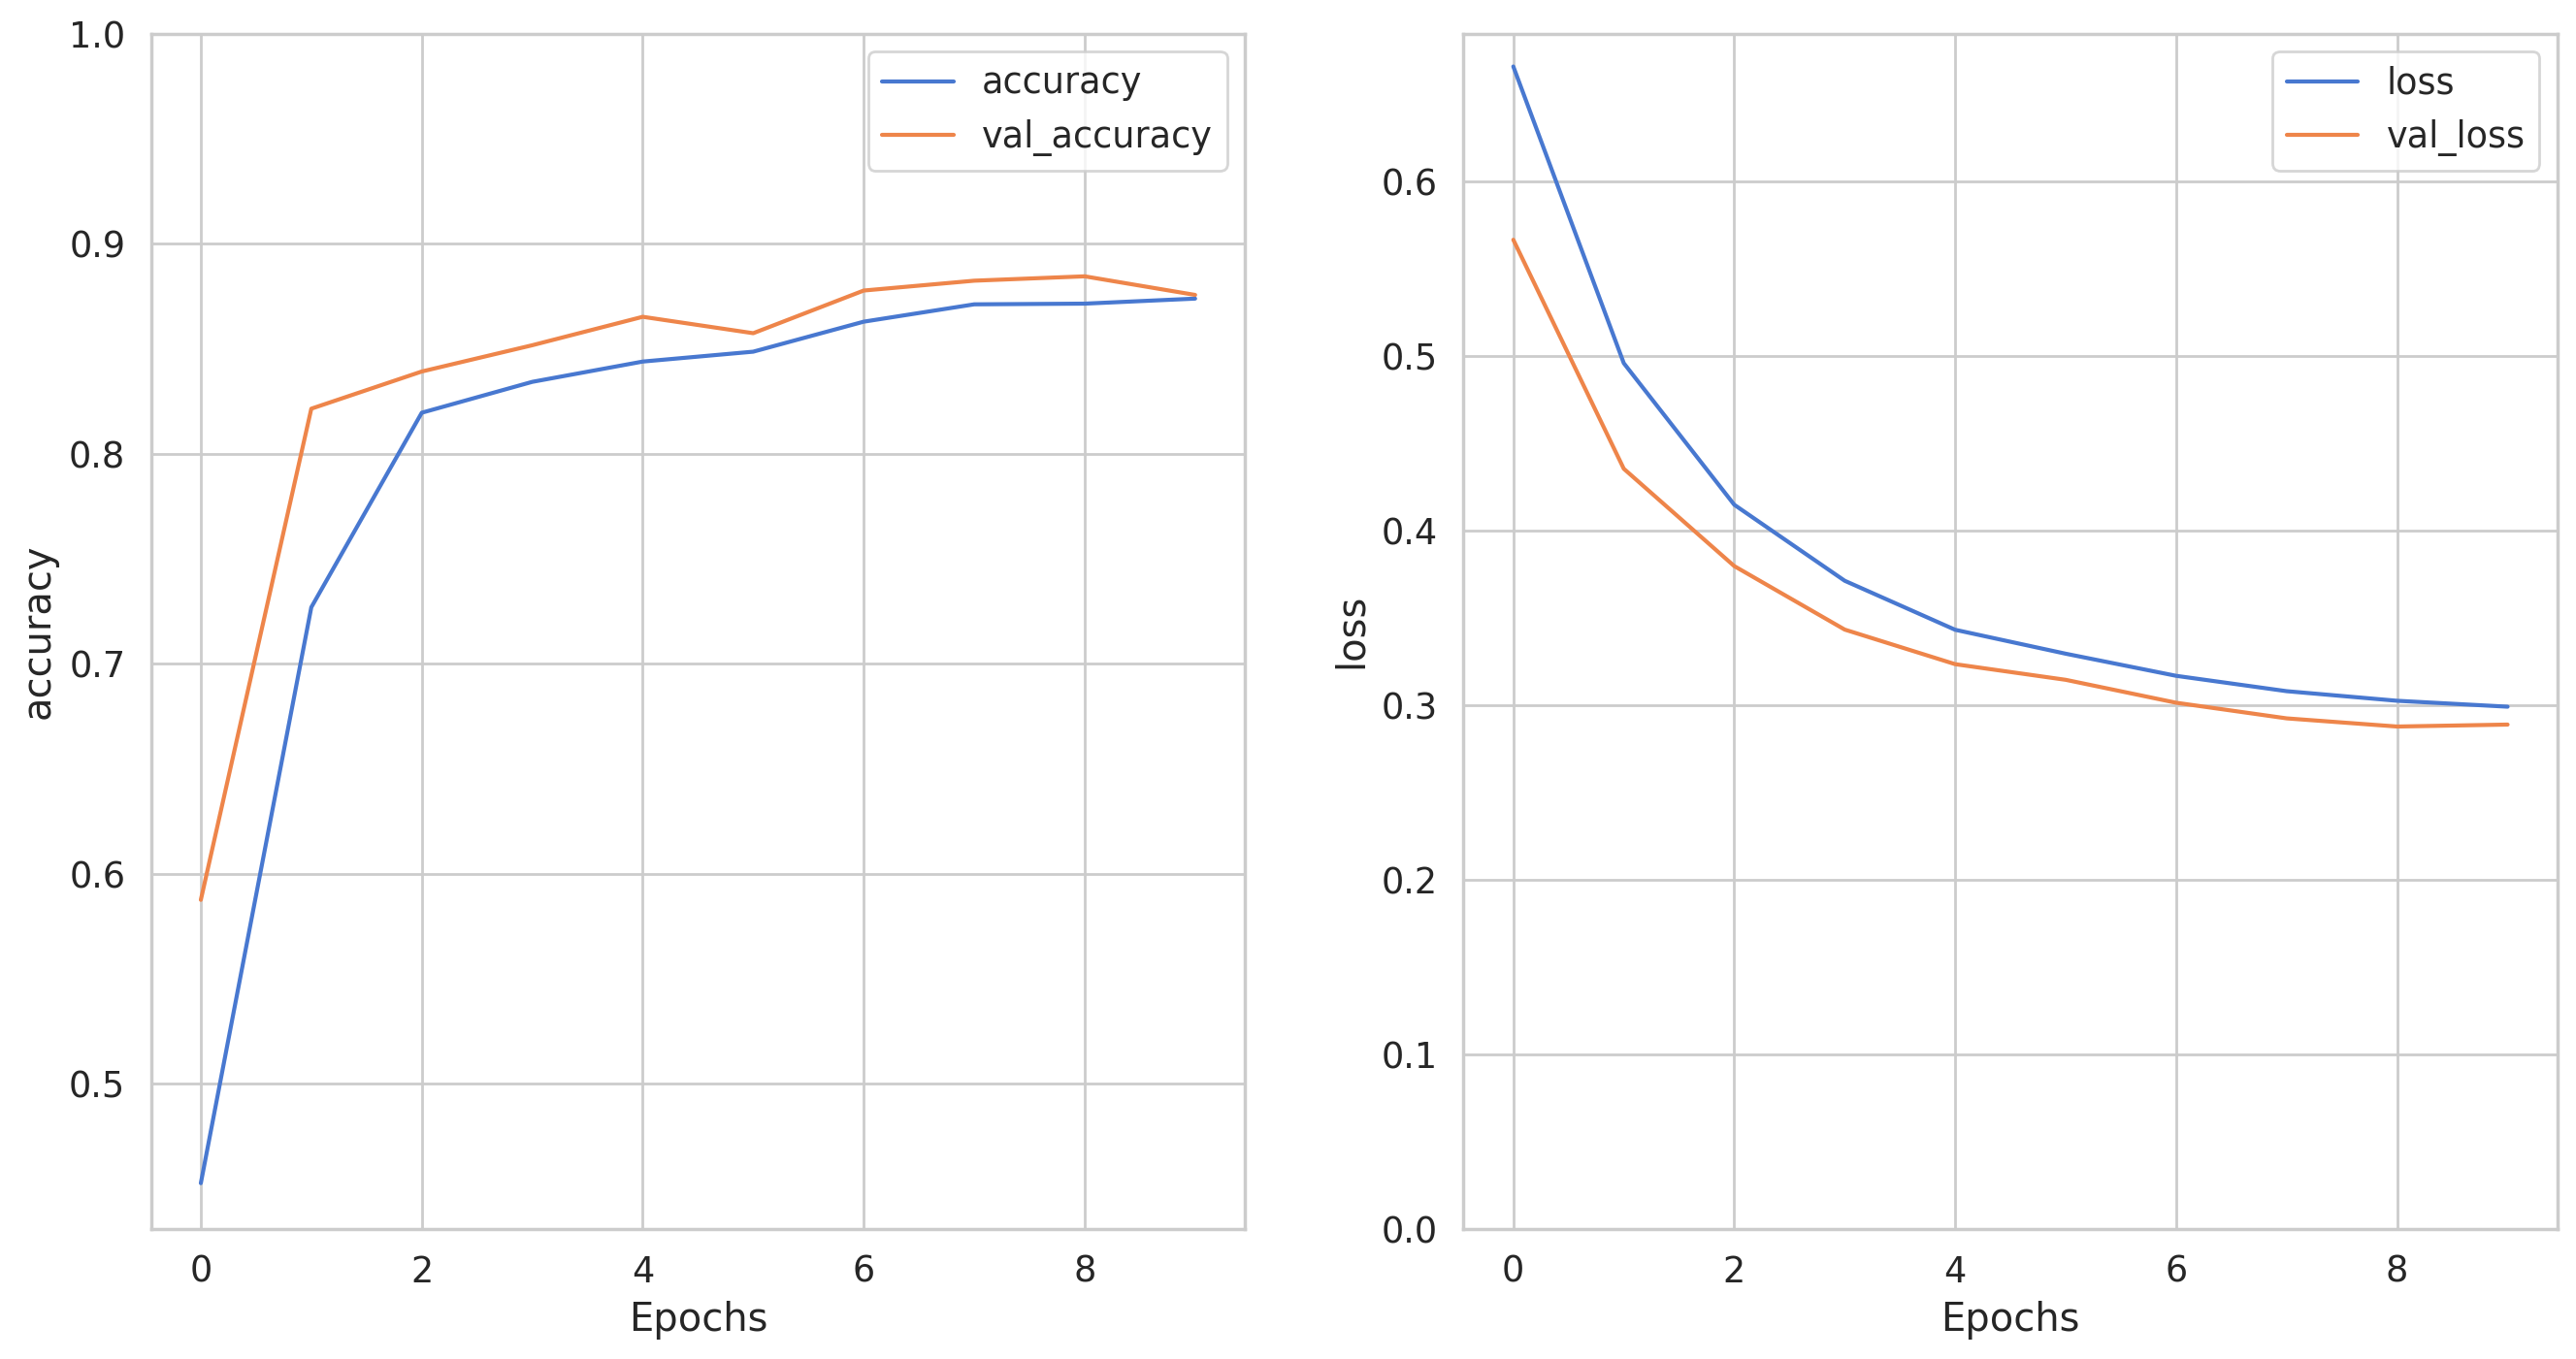

In [43]:
# Grafico de Accuracy e Loss

test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

print("\n------------------")


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

**Gráfico de Accuracy:**

O resultado obitdo pelo grafico de Accuracy nos mostra um comportamento de convergencia, onde o treinamento e validação estão melhorando e a diferença entre eles é constante ou diminuindo, indicando que o modelo está aprendendo bem e sem Overfitting.

**Gráfico de Loss:**

Já para o Grafico de loss observa-se um comportamento de diminuição contínua, onde a perda  diminui tanto no treinamento quanto na validação ao longo das épocas, refletindo que o modelo está se tornando cada vez mais preciso em suas previsões.



In [44]:
#Teste do Modelo

# Input do usuário
sample_text = input("Digite o texto para realizar a previsão: ")

# Realizar a predição no texto de exemplo sem padding
predictions = model.predict(np.array([sample_text]))

# Imprimir a previsão
print("Previsão:", predictions)

# Escrever a sentença com base na previsão
if predictions >= 1:
    print("A previsão é positiva.")
else:
    print("A previsão é negativa.")

Digite o texto para realizar a previsão: Pessimo aplicativo, demora a carregar, é lento
1/1 [==============================] - 3s 3s/step
Previsão: [[-2.1780019]]
A previsão é negativa.


A célula acima consiste na aplicação das predições para um texto de entrada afim de testar o modelo na prática com novos dados de entrada.

## III. Recurrent Neural Network (RNN) - Empilhamento de duas camadas LSTM

Mirando o desenvolvimento de um modelo mais avançado optou-se por avaliar uma arquitetura de rede neural recorrente com empilhamento de duas camadas LSTM, configuradas de maneira bidirecional.

As camadas recorrentes de Keras têm dois modos disponíveis que são controlados pelo argumento do construtor `return_sequences`:

* Se `False` retorna apenas a última saída para cada sequência de entrada (um tensor 2D de forma (batch_size, output_features)). Este é o padrão, usado no modelo anterior.

* Se `True` as sequências completas de saídas sucessivas para cada timestep são retornadas (um tensor 3D de forma `(batch_size, timesteps, output_features)`).

Aqui está a aparência do fluxo de informações com `return_sequences=True`:


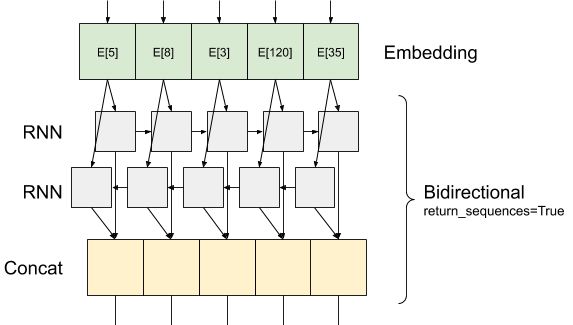

Este modelo é projetado para lidar com dados sequenciais, como texto, e capturar informações de contexto usando camadas LSTM bidirecionais, seguidas por camadas densas para processamento e classificação final.

*   A primeira camada LSTM (tf.keras.layers.LSTM(64, return_sequences=True)) possui 64 unidades e retorna sequências completas de saída para cada etapa de tempo. Isso é essencial para fornecer a sequência inteira à próxima camada LSTM, pois o processamento subsequente precisa das saídas de todos os tempos anteriores.
*   A segunda camada LSTM (tf.keras.layers.LSTM(32)) possui 32 unidades e, por padrão, retorna apenas a saída do último passo de tempo. Esta configuração é útil para tarefas onde a previsão depende de toda a sequência de entrada, como classificação de texto.



In [32]:
#Empilhamento de duas camadas LSTM

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [34]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [35]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
190/190 [==============================] - 77s 307ms/step - loss: 0.6759 - accuracy: 0.4454 - val_loss: 0.5992 - val_accuracy: 0.4604
Epoch 2/10
190/190 [==============================] - 54s 284ms/step - loss: 0.4992 - accuracy: 0.6789 - val_loss: 0.4267 - val_accuracy: 0.7688
Epoch 3/10
190/190 [==============================] - 56s 295ms/step - loss: 0.4148 - accuracy: 0.7943 - val_loss: 0.3778 - val_accuracy: 0.8438
Epoch 4/10
190/190 [==============================] - 62s 327ms/step - loss: 0.3736 - accuracy: 0.8364 - val_loss: 0.3451 - val_accuracy: 0.8568
Epoch 5/10
190/190 [==============================] - 53s 280ms/step - loss: 0.3512 - accuracy: 0.8525 - val_loss: 0.3228 - val_accuracy: 0.8677
Epoch 6/10
190/190 [==============================] - 53s 281ms/step - loss: 0.3351 - accuracy: 0.8649 - val_loss: 0.3121 - val_accuracy: 0.8885
Epoch 7/10
190/190 [==============================] - 56s 292ms/step - loss: 0.3209 - accuracy: 0.8719 - val_loss: 0.2962 - val_ac

190/190 [==============================] - 15s 77ms/step - loss: 0.2756 - accuracy: 0.9039
Test Loss: 0.2756063938140869
Test Accuracy: 0.9038969874382019

------------------


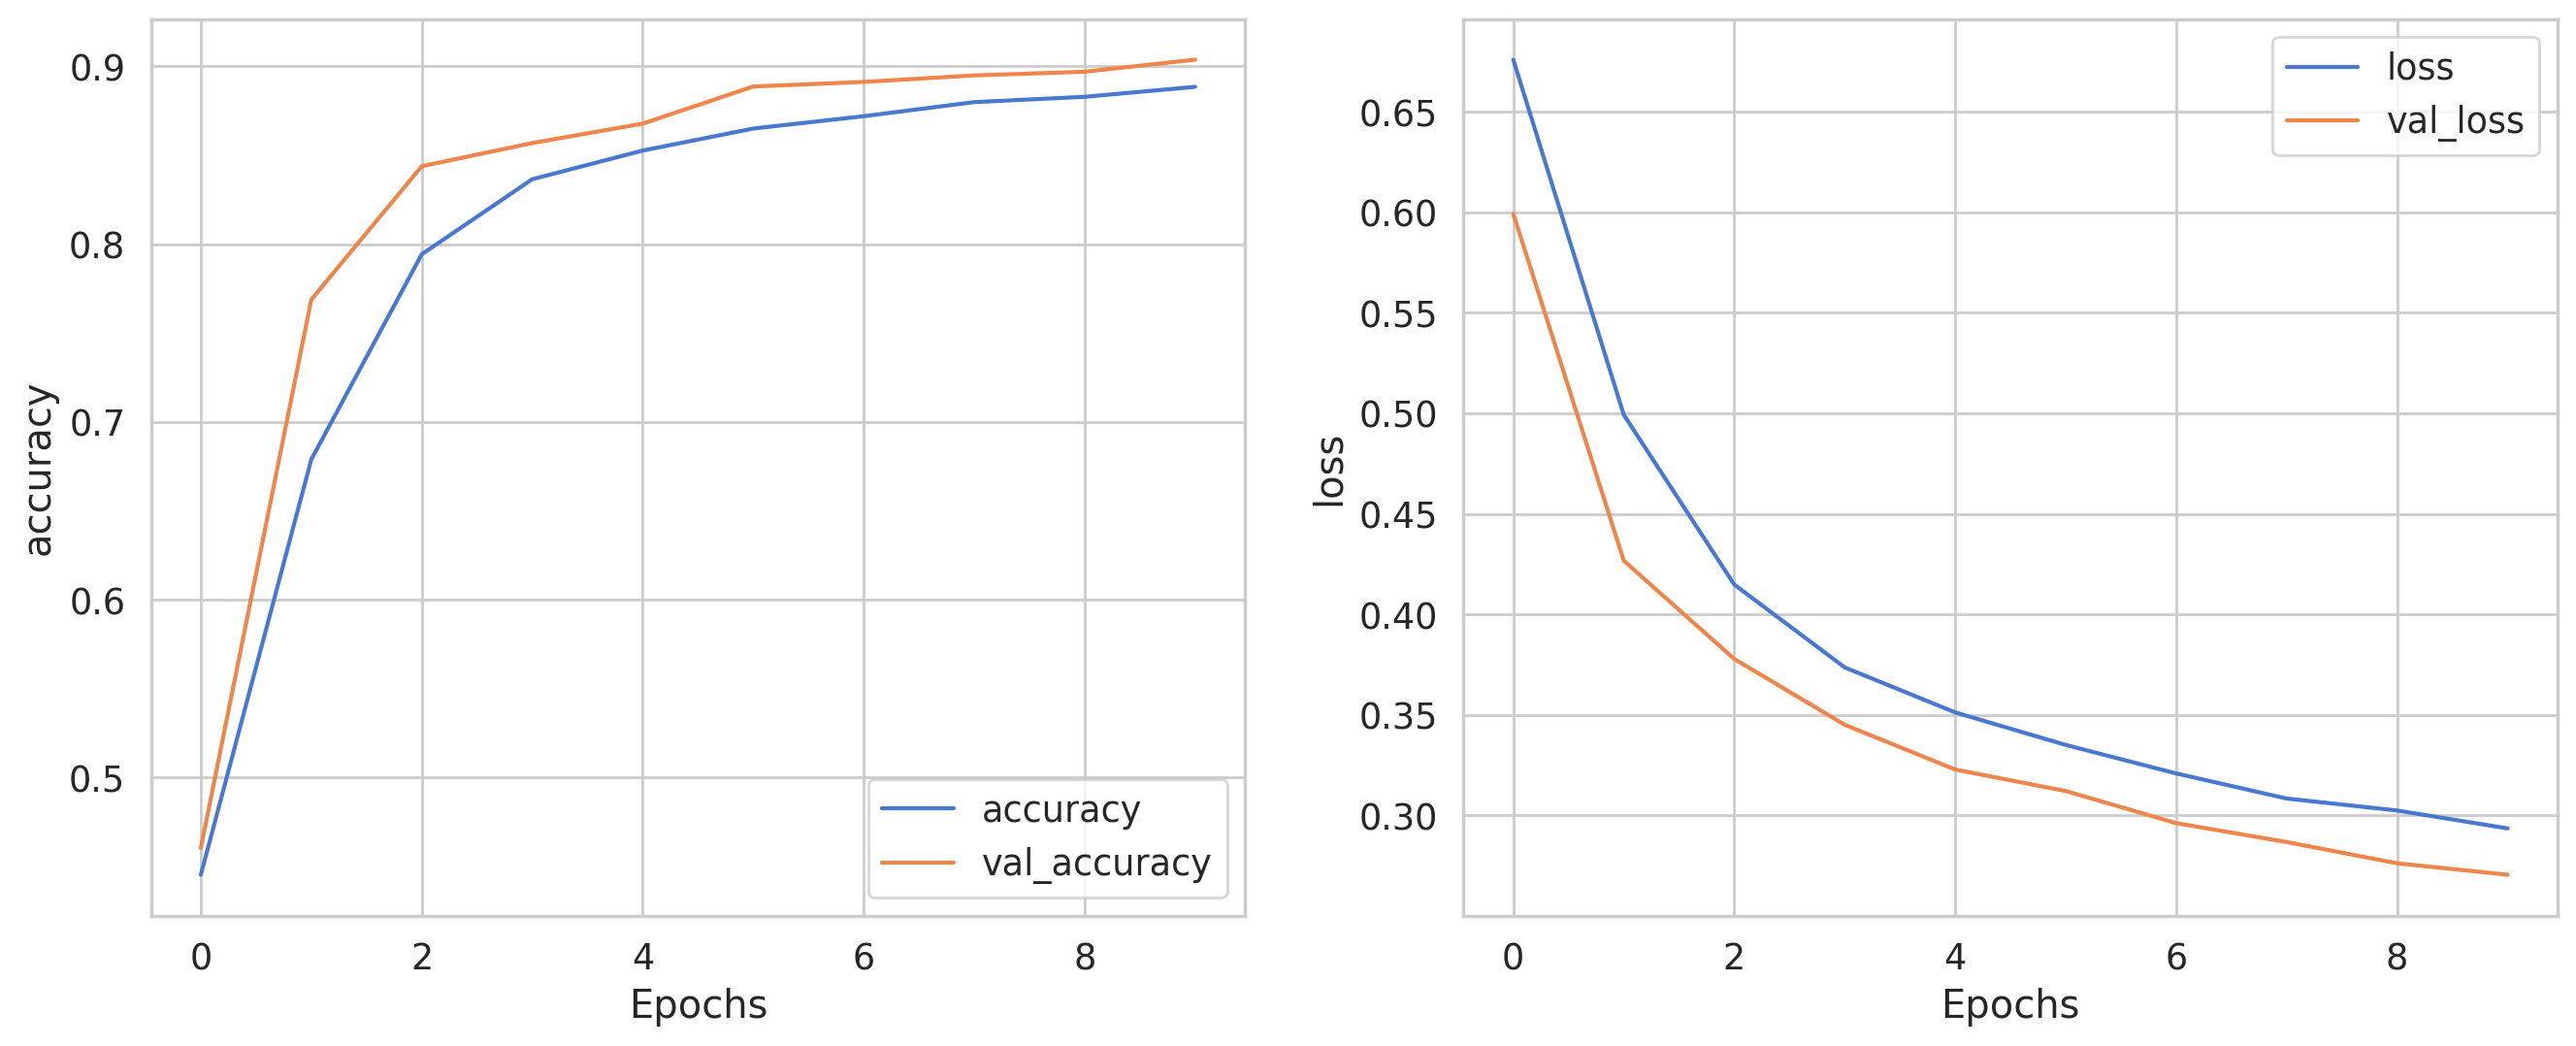

In [36]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

print("\n------------------")

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

**Gráfico de Accuracy:**

O resultado obitdo pelo grafico de Accuracy melhores resultados de acurácia que o modelo de uma camada, além de apresentar uma convergência estável, indicando uma aprendizagem mais sólida e uma melhor capacidade de generalização.

**Gráfico de Loss:**

Para o Grafico de loss observa-se a diiminuição tanto no treinamento quanto na validação ao longo das épocas, revelando um precisão maior que ao modelo anterior.


In [ ]:
#Teste do Modelo

# Input do usuário
sample_text = input("Digite o texto para realizar a previsão: ")

# Realizar a predição no texto de exemplo sem padding
predictions = model.predict(np.array([sample_text]))

# Imprimir a previsão
print("Previsão:", predictions)

# Escrever a sentença com base na previsão
if predictions >= 1:
    print("A previsão é positiva.")
else:
    print("A previsão é negativa.")

Digite o texto para realizar a previsão: Aplicativo pessimo, demora a carregar
1/1 [==============================] - 5s 5s/step
Previsão: [[-2.169832]]
A previsão é negativa.


# Resultados e Conclusões

Este projeto teve como objetivo a análise de sentimentos em avaliações de aplicativos de comida/entrega. Inicialmente, os dados foram coletados a partir das análises dos usuários na Google Play Store.

Posteriormente, técnicas avançadas de pré-processamento foram aplicadas, incluindo análise e limpeza dos dados para remoção de informações ambíguas e padronização do texto para facilitar a análise. Além disso, a redução das classes para duas categorias (positivo e negativo) permitiu uma abordagem mais simplificada e precisa na classificação das avaliações.

Optou-se por utilizar uma rede neural recorrente (RNN) como modelo de Deep Learning, nela foi aplicada a avaliação de hiperparâmetros para identificar a combinação que produzisse a melhor acurácia de validação. A combinação ideal foi de 10 épocas de treinamento, 64 unidades LSTM e função de ativação relu, resultando em uma precisão de 84.23%.

O projeto apresentou resultados distintos entre os modelos de uma camada LSTM e o empilhamento de duas camadas LSTM. O primeiro modelo, embora eficaz, foi superado pelo modelo empilhado com duas camadas LSTM, que demonstrou uma capacidade mais robusta de aprender e generalizar padrões nos dados de entrada, apresentando uma convergência estável nos gráficos de Accuracy e Loss, indicando uma aprendizagem mais sólida e uma melhor capacidade de generalização com uma acuracia de 90%. Enquanto o modelo de uma camada LSTM oferece uma abordagem mais simples e eficiente, o empilhamento de duas camadas LSTM proporciona uma capacidade aprimorada de capturar informações contextuais e nuances nos dados, resultando em uma análise de sentimentos mais precisa e confiável. Por fim, é possivel afirma que o projeto atingiu seu objetivo, passando nos testes de modelo e obtendo altos resultados de precisão.